In [1]:
import tensorflow as tf 
import os
import numpy as np 

from matplotlib import pyplot as plt 
%matplotlib inline

#if not os.path.isdir('models'):
    #os.mkdir('model')

print('TensorFlow version',tf.__version__)

TensorFlow version 2.13.0


In [2]:
def get_three_classes(x,y):
    indices_0,_=np.where(y==0.)
    indices_1,_=np.where(y==1.)
    indices_2,_=np.where(y==2.)

    indices=np.concatenate([indices_0,indices_1,indices_2],axis=0)
    x=x[indices]
    y=y[indices]
    count=x.shape[0]
    indices=np.random.choice(range(count),count,replace=False)
    x=x[indices]
    y=y[indices]

    y=tf.keras.utils.to_categorical(y)
    return(x,y)

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_three_classes(x_train,y_train)
x_test,y_test=get_three_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


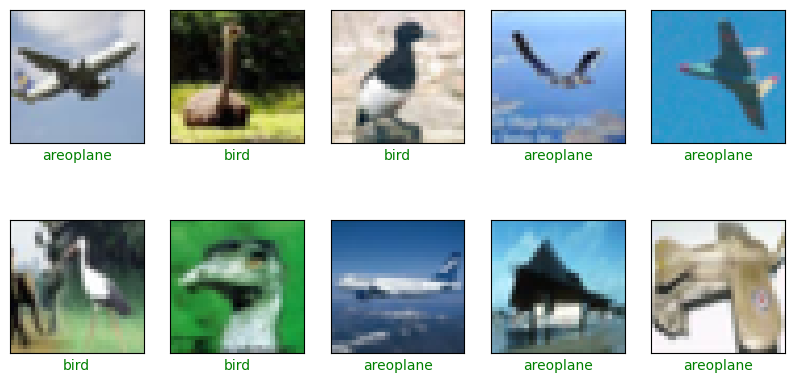

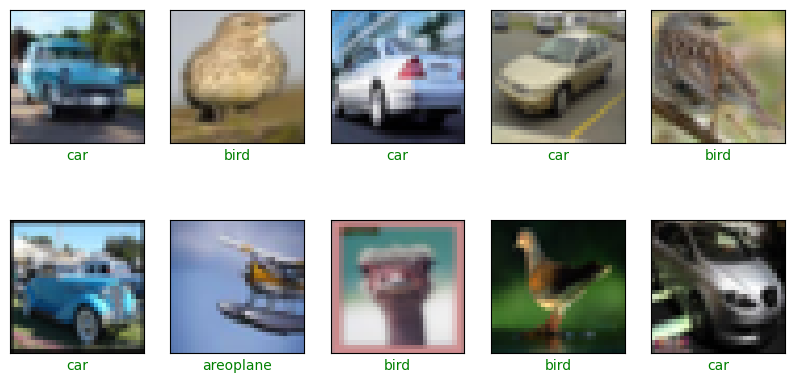

In [3]:
class_name=['areoplane','car','bird']

def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]

    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])

        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_name[np.argmax(p[i])],color=col)
plt.show()

show_random_examples(x_train,y_train,y_train)
show_random_examples(x_test,y_test,y_test)
    

In [4]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense

def create_model():
    def add_cov_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())

        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0,5))
        return model
    model=tf.keras.Sequential()
    model.add(Input(shape=(32,32,3)))
    model=add_cov_block(model,32)
    model=add_cov_block(model,64)
    model=add_cov_block(model,128)

    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model
model=create_model()



In [5]:
h=model.fit(
    x_train/255.,y_train,
    validation_data=(x_test/255.,y_test,),
    epochs=10,batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
        tf.keras.callbacks.ModelCheckpoint('model/model_{val_accuracy:.3f}.h5',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           monitor='val_accuracy')
    ]
)

Epoch 1/10
118/118 [==============================] - ETA: 0s - loss: 0.5675 - accuracy: 0.7814

c:\Users\Pc\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 527s 4s/step - loss: 0.5675 - accuracy: 0.7814 - val_loss: 1.7961 - val_accuracy: 0.3610
Epoch 2/10
118/118 [==============================] - 186s 2s/step - loss: 0.3298 - accuracy: 0.8702 - val_loss: 2.4157 - val_accuracy: 0.3820
Epoch 3/10
118/118 [==============================] - 328s 3s/step - loss: 0.2346 - accuracy: 0.9094 - val_loss: 2.0310 - val_accuracy: 0.5590
Epoch 4/10
118/118 [==============================] - 222s 2s/step - loss: 0.1736 - accuracy: 0.9341 - val_loss: 1.0036 - val_accuracy: 0.6320
Epoch 5/10
118/118 [==============================] - 341s 3s/step - loss: 0.1224 - accuracy: 0.9541 - val_loss: 0.2711 - val_accuracy: 0.9037
Epoch 6/10
118/118 [==============================] - 309s 3s/step - loss: 0.0806 - accuracy: 0.9722 - val_loss: 0.2995 - val_accuracy: 0.8943
Epoch 7/10
118/118 [==============================] - 262s 2s/step - loss: 0.0644 - accuracy: 0.9767 - val_loss: 0.3556 - val_accuracy: 0.8900
Epoch 8/10

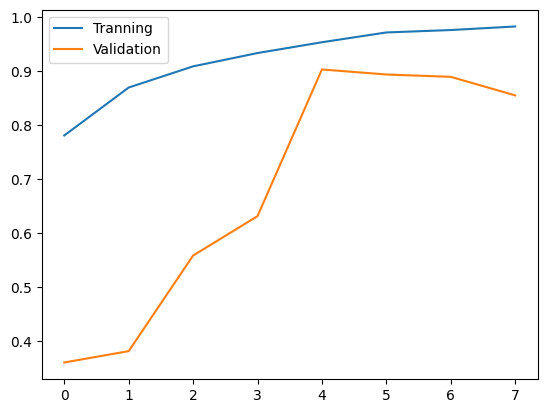

In [14]:
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']

plt.plot(range(len(accs)),accs,label='Tranning')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.legend()
plt.show()

In [11]:
model=tf.keras.models.load_model('model/model_0.904.h5')


In [12]:
prediction=model.predict(x_test/255.)


94/94 [==============================] - 11s 108ms/step


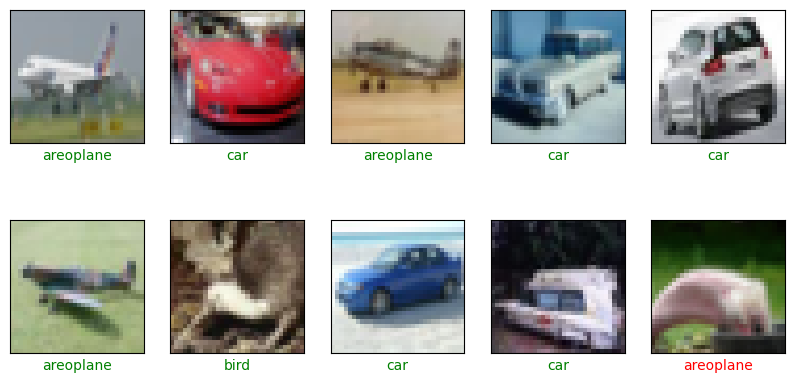

In [13]:
show_random_examples(x_test,y_test,prediction)